<a href="https://colab.research.google.com/github/SowjanyaKiran/Time_series_sowanya/blob/main/LSTM_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
#Read the dataset
# ✅ Step 2: Load Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

In [ ]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
#Summarize the data
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
df.shape

(144, 1)

In [ ]:
df.dtypes

,0
Passengers,int64


In [ ]:
#Performing EDA
df.isnull().sum()

,0
Passengers,0


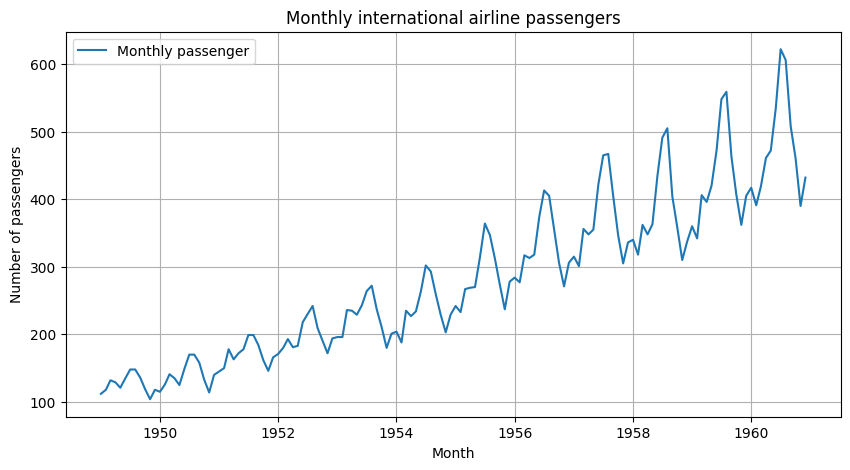

In [ ]:
#plot
plt.figure(figsize = (10,5))
plt.plot(df , label = 'Monthly passenger')
plt.title("Monthly international airline passengers")
plt.xlabel("Month")
plt.ylabel("Number of passengers")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Scale dataset
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
data = df.values
sc = MinMaxScaler(feature_range = (0 , 1))
scaled_data = sc.fit_transform(data)

In [ ]:
#prepare train and test split
#last 24 months for generating 12 input -> 12 output sequences
test_data = scaled_data[-24:]
x_test , y_test = [] , []

for i in range(12 , 24):
  x_test.append(test_data[i-12:i , 0])
  y_test.append(test_data[i , 0])

x_test , y_test = np.array(x_test) , np.array(y_test)
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , 1))

In [ ]:
x_test[0] , y_test[0]

(array([[0.49420849],
        [0.45945946],
        [0.58301158],
        [0.56370656],
        [0.61003861],
        [0.71042471],
        [0.85714286],
        [0.87837838],
        [0.69305019],
        [0.58494208],
        [0.4980695 ],
        [0.58108108]]),
 np.float64(0.6042471042471043))

In [ ]:
#Train data = all before last 12 months
train_data = scaled_data[:-12]
x_train , y_train = [] , []

for i in range(12 , len(train_data)):
  x_train.append(train_data[i-12:i , 0])
  y_train.append(train_data[i , 0])

x_train , y_train = np.array(x_train) , np.array(y_train)
x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , 1))

In [ ]:
x_train[0] , y_train[0]

(array([[0.01544402],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703]]),
 np.float64(0.02123552123552122))

In [ ]:
#Build and Train the RNN Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(12, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=350)

Epoch 1/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1584
Epoch 2/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0766 
Epoch 3/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0277
Epoch 4/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0221
Epoch 5/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0227
Epoch 6/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0148
Epoch 7/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0145
Epoch 8/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0130
Epoch 9/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0133
Epoch 10/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0088
Epoch 11/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0100
Epoch 12/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0105
Epoch 13/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0119
Epoch 14/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107
Epoch 15/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0103
Epoch 16/350
4/4 ━

In [ ]:
#Predict the Last 12 Months (Test Set)
x_test

array([[[0.49420849],
        [0.45945946],
        [0.58301158],
        [0.56370656],
        [0.61003861],
        [0.71042471],
        [0.85714286],
        [0.87837838],
        [0.69305019],
        [0.58494208],
        [0.4980695 ],
        [0.58108108]],

       [[0.45945946],
        [0.58301158],
        [0.56370656],
        [0.61003861],
        [0.71042471],
        [0.85714286],
        [0.87837838],
        [0.69305019],
        [0.58494208],
        [0.4980695 ],
        [0.58108108],
        [0.6042471 ]],

       [[0.58301158],
        [0.56370656],
        [0.61003861],
        [0.71042471],
        [0.85714286],
        [0.87837838],
        [0.69305019],
        [0.58494208],
        [0.4980695 ],
        [0.58108108],
        [0.6042471 ],
        [0.55405405]],

       [[0.56370656],
        [0.61003861],
        [0.71042471],
        [0.85714286],
        [0.87837838],
        [0.69305019],
        [0.58494208],
        [0.4980695 ],
        [0.58108108],
    

In [ ]:
predicted_test_scaled = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


In [ ]:
predicted_test_scaled

array([[0.49030483],
       [0.4857169 ],
       [0.5321893 ],
       [0.5588732 ],
       [0.64175075],
       [0.75454193],
       [0.8680503 ],
       [0.8957229 ],
       [0.7885504 ],
       [0.68678963],
       [0.6128283 ],
       [0.5877724 ]], dtype=float32)

In [ ]:
predicted_test = sc.inverse_transform(predicted_test_scaled)

In [ ]:
predicted_test_scaled

array([[0.49030483],
       [0.4857169 ],
       [0.5321893 ],
       [0.5588732 ],
       [0.64175075],
       [0.75454193],
       [0.8680503 ],
       [0.8957229 ],
       [0.7885504 ],
       [0.68678963],
       [0.6128283 ],
       [0.5877724 ]], dtype=float32)

In [ ]:
y_test

array([0.6042471 , 0.55405405, 0.60810811, 0.68918919, 0.71042471,
       0.83204633, 1.        , 0.96911197, 0.77992278, 0.68918919,
       0.55212355, 0.63320463])

In [ ]:
# Inverse scale real test values
real_test = sc.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
real_test

array([[417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.]])

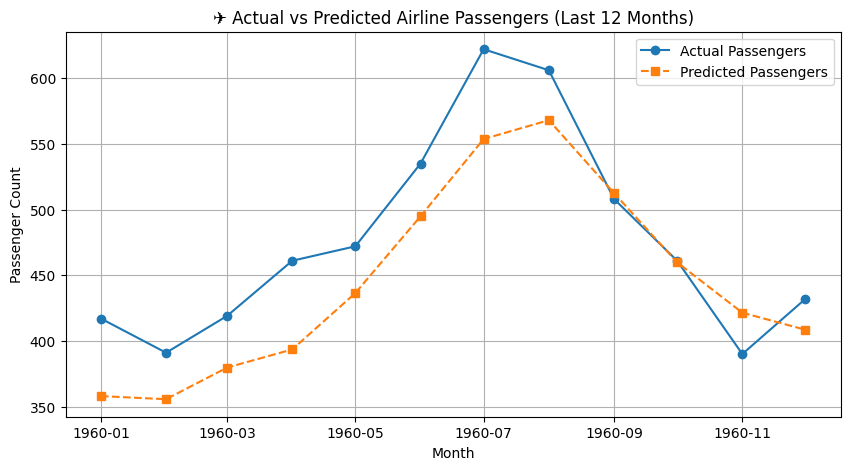

In [ ]:
test_dates = df.index[-12:]

plt.figure(figsize=(10, 5))
plt.plot(test_dates, real_test, marker='o', label='Actual Passengers')
plt.plot(test_dates, predicted_test, marker='s', linestyle='--', label='Predicted Passengers')
plt.title("✈️ Actual vs Predicted Airline Passengers (Last 12 Months)")
plt.xlabel("Month")
plt.ylabel("Passenger Count")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import math

# ✅ Calculate RMSE
rmse = math.sqrt(mean_squared_error(real_test, predicted_test))
print("RMSE on Test Set (Last 12 Months):", rmse)

RMSE on Test Set (Last 12 Months): 42.22779562476905


In [ ]:
#Predict the Next 12 Months (Future Forecast)
# Use the last 12 months of the entire dataset as input
last_sequence = scaled_data[-12:].reshape(1, 12, 1)

future_predictions_scaled = []

for _ in range(12):  # Predict next 12 months
    next_pred_scaled = model.predict(last_sequence)[0, 0]
    future_predictions_scaled.append(next_pred_scaled)

    # Update input sequence
    new_input = np.append(last_sequence[0, 1:, 0], next_pred_scaled)
    last_sequence = new_input.reshape(1, 12, 1)

# Inverse scale the future predictions
future_predictions = sc.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
future_predictions

array([[383.44464],
       [362.73227],
       [371.6052 ],
       [391.69153],
       [420.90988],
       [475.43408],
       [536.916  ],
       [560.79987],
       [537.9295 ],
       [510.473  ],
       [468.43814],
       [451.59955]], dtype=float32)

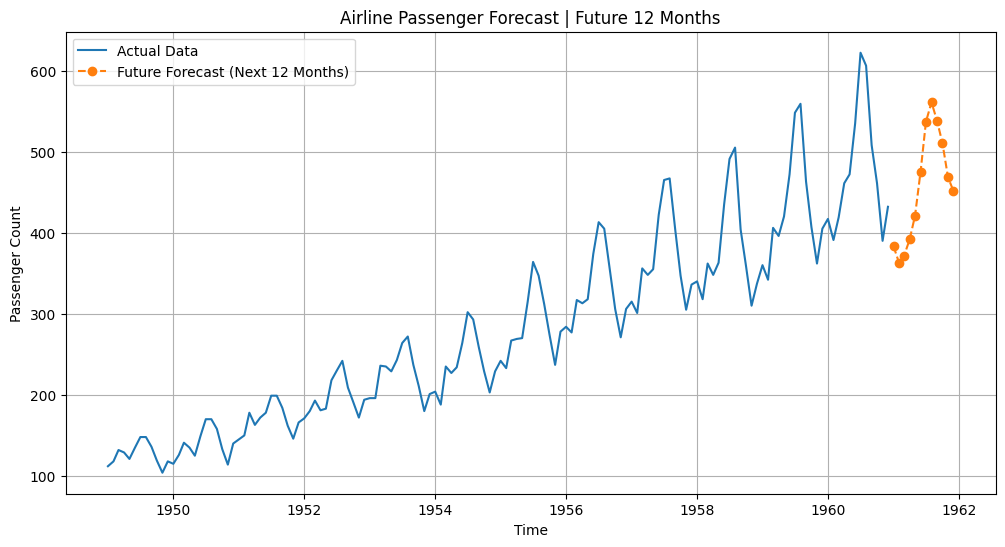

In [ ]:
#Plot Original + Future 12 Month Predictions
# Create future date index (after last date in dataset)
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

# Plot full data + future
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Actual Data')
plt.plot(future_dates, future_predictions, label='Future Forecast (Next 12 Months)', linestyle='--', marker='o')
plt.title("Airline Passenger Forecast | Future 12 Months")
plt.xlabel("Time")
plt.ylabel("Passenger Count")
plt.grid(True)
plt.legend()
plt.show()